<img src="mioti.png" style="height: 100px">
<center style="color:#888">Data Science in IoT<br/>Asignatura: Predictive Analytics</center>

# Challenge S1: Introducción a las series Temporales

## 0. Objetivo

<img src="bicicletas_chicago_challenge.jpg" style="float:right; height: 250px"></img>
El objetivo de este challenge es realizar el análisis de una serie temporal y eliminar sus componentes de estacionalidad y tendencia.

Vamos a utilizar el dataset de los alquileres de bicicletas de Chicago, pero en este caso utilizaremos como serie temporal el número de **alquileres de los usuarios registrados**.

Además, realizaremos el análisis con los **datos a nivel horario**, es decir, sin agrupar.

ernestopm@faculty.mioti.es

## 1. Preparar el contexto

Como paso previo, cargamos las librerías que serán necesarias en nuestro estudio.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Definimos las variables para determinar el tamaño de las gráficas
fig_size = (18,6)
fig_size_subplot = (14,7)

## 2. Pretratado de los datos

Recuerda que en este ejercicio, debemos leer nuestro fichero y crear un dataframe con la serie temporal que incluya nuestra variable tiempo y el número de alquileres de usuarios registrados.

In [2]:
## Carga del fichero
data_path = 'hour_chicago.csv'
df = pd.read_csv(data_path)

In [3]:
df.head()

date_str  season  yr  mnth  hr  holiday  weekday  workingday  temp   hum  \
0  2011-01-01       1   0     1   0        0        6           0  0.24  0.81   
1  2011-01-01       1   0     1   1        0        6           0  0.22  0.80   
2  2011-01-01       1   0     1   2        0        6           0  0.22  0.80   
3  2011-01-01       1   0     1   3        0        6           0  0.24  0.75   
4  2011-01-01       1   0     1   4        0        6           0  0.24  0.75   

   windspeed  casual  registered  cnt  
0        0.0       3          13   16  
1        0.0       8          32   40  
2        0.0       5          27   32  
3        0.0       3          10   13  
4        0.0       0           1    1

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
date_str      17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
temp          17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(3), int64(10), object(1)
memory usage: 1.9+ MB


In [5]:
## Creación de la variable tiempo
df['date_hr'] = (df['date_str'].map(str) + ' ' + df['hr'].map(str) + ':00:00')
df['date_hr'].head()
df['date'] = pd.to_datetime(df['date_hr'], format='%Y-%m-%d %H:%M:%S')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
date_str      17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
temp          17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
date_hr       17379 non-null object
date          17379 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(10), object(2)
memory usage: 2.1+ MB


In [6]:
df.index = df['date']
df.head()

date_str  season  yr  mnth  hr  holiday  weekday  \
date                                                                      
2011-01-01 00:00:00  2011-01-01       1   0     1   0        0        6   
2011-01-01 01:00:00  2011-01-01       1   0     1   1        0        6   
2011-01-01 02:00:00  2011-01-01       1   0     1   2        0        6   
2011-01-01 03:00:00  2011-01-01       1   0     1   3        0        6   
2011-01-01 04:00:00  2011-01-01       1   0     1   4        0        6   

                     workingday  temp   hum  windspeed  casual  registered  \
date                                                                         
2011-01-01 00:00:00           0  0.24  0.81        0.0       3          13   
2011-01-01 01:00:00           0  0.22  0.80        0.0       8          32   
2011-01-01 02:00:00           0  0.22  0.80        0.0       5          27   
2011-01-01 03:00:00           0  0.24  0.75        0.0       3          10   
2011-01-01 04:00:00           0  0.24  0.75        0.0       0           1   

                     cnt             date_hr                date  
date                                                              
2011-01-01 00:00:00   16  2011-01-01 0:00:00 2011-01-01 00:00:00  
2011-01-01 01:00:00   40  2011-01-01 1:00:00 2011-01-01 01:00:00  
2011-01-01 02:00:00   32  2011-01-01 2:00:00 2011-01-01 02:00:00  
2011-01-01 03:00:00   13  2011-01-01 3:00:00 2011-01-01 03:00:00  
2011-01-01 04:00:00    1  2011-01-01 4:00:00 2011-01-01 04:00:00

In [7]:
## Creación del dataframe con nuestra serie temporal
df_TimeSeriesData = pd.DataFrame(df['registered'])
df_TimeSeriesData.head()

registered
date                           
2011-01-01 00:00:00          13
2011-01-01 01:00:00          32
2011-01-01 02:00:00          27
2011-01-01 03:00:00          10
2011-01-01 04:00:00           1

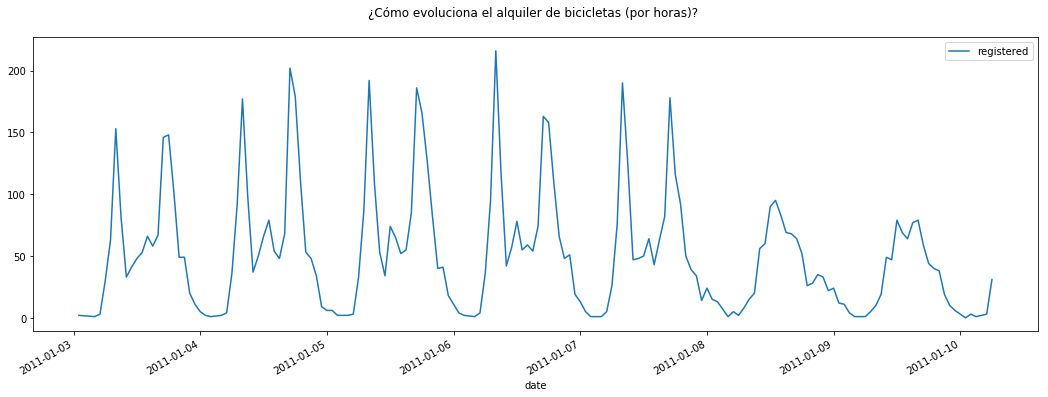

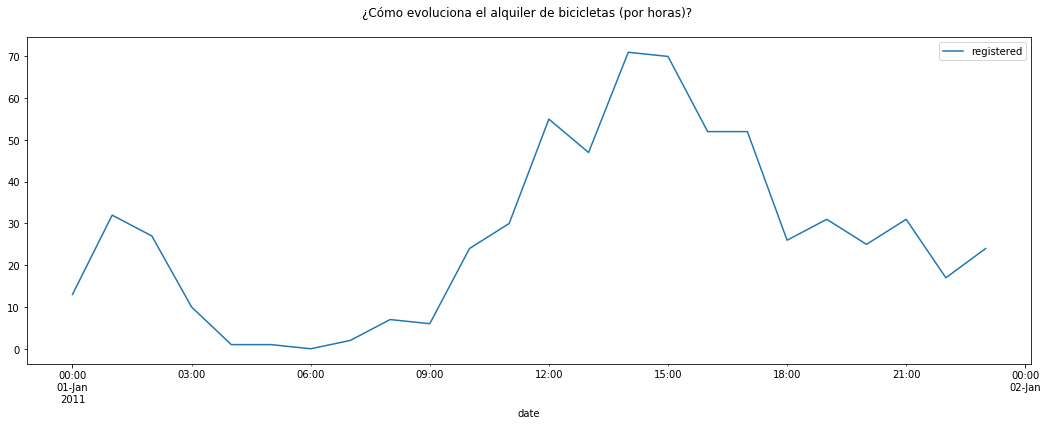

In [8]:
## Visualización de nuestra serie temporal
df_TimeSeriesData[48:(24*9)].plot(figsize = fig_size,\
                       title = '¿Cómo evoluciona el alquiler de bicicletas (por horas)? \n')

## Hacemos un zoom sobre unos cuantos días para apreciar mejor el comportamiento
df_TimeSeriesData[:24].plot(figsize = fig_size,\
                       title = '¿Cómo evoluciona el alquiler de bicicletas (por horas)? \n')

## 3. Componentes de una serie temporal

**P: ¿Qué componentes tiene nuestra serie temporal?**

Diaria, Semanal, Mensual y Anual

**P: ¿Hay más de un tipo de estacionalidad?**

Diaria, Semanal, Mensual y Anual

### 3.1. Si existe componente estacional, elimínala y representa los resultados.

In [9]:
"""
Empezaremos eliminando la componente diaria. Para ello,
haremos uso de una media móvil con un período de 24h
"""
df_TimeSeriesData['estacionalidad_diaria'] = df_TimeSeriesData.rolling(24).mean()
df_TimeSeriesData

registered  estacionalidad_diaria
date                                                  
2011-01-01 00:00:00          13                    NaN
2011-01-01 01:00:00          32                    NaN
2011-01-01 02:00:00          27                    NaN
2011-01-01 03:00:00          10                    NaN
2011-01-01 04:00:00           1                    NaN
2011-01-01 05:00:00           1                    NaN
2011-01-01 06:00:00           0                    NaN
2011-01-01 07:00:00           2                    NaN
2011-01-01 08:00:00           7                    NaN
2011-01-01 09:00:00           6                    NaN
2011-01-01 10:00:00          24                    NaN
2011-01-01 11:00:00          30                    NaN
2011-01-01 12:00:00          55                    NaN
2011-01-01 13:00:00          47                    NaN
2011-01-01 14:00:00          71                    NaN
2011-01-01 15:00:00          70                    NaN
2011-01-01 16:00:00          52                    NaN
2011-01-01 17:00:00          52                    NaN
2011-01-01 18:00:00          26                    NaN
2011-01-01 19:00:00          31                    NaN
2011-01-01 20:00:00          25                    NaN
2011-01-01 21:00:00          31                    NaN
2011-01-01 22:00:00          17                    NaN
2011-01-01 23:00:00          24              27.250000
2011-01-02 00:00:00          13              27.250000
2011-01-02 01:00:00          16              26.583333
2011-01-02 02:00:00           8              25.791667
2011-01-02 03:00:00           4              25.541667
2011-01-02 04:00:00           1              25.541667
2011-01-02 06:00:00           2              25.583333
...                         ...                    ...
2012-12-30 18:00:00         113              61.041667
2012-12-30 19:00:00          86              60.875000
2012-12-30 20:00:00          63              60.833333
2012-12-30 21:00:00          42              60.250000
2012-12-30 22:00:00          30              59.375000
2012-12-30 23:00:00          39              59.666667
2012-12-31 00:00:00          30              59.208333
2012-12-31 01:00:00          13              58.625000
2012-12-31 02:00:00           8              58.166667
2012-12-31 03:00:00           1              57.625000
2012-12-31 04:00:00           3              57.458333
2012-12-31 05:00:00           9              57.750000
2012-12-31 06:00:00          40              59.125000
2012-12-31 07:00:00          83              62.041667
2012-12-31 08:00:00         187              68.500000
2012-12-31 09:00:00         144              71.791667
2012-12-31 10:00:00          87              71.625000
2012-12-31 11:00:00         114              72.083333
2012-12-31 12:00:00         172              75.208333
2012-12-31 13:00:00         165              77.083333
2012-12-31 14:00:00         185              79.750000
2012-12-31 15:00:00         246              85.791667
2012-12-31 16:00:00         184              89.208333
2012-12-31 17:00:00         150              91.416667
2012-12-31 18:00:00         112              91.375000
2012-12-31 19:00:00         108              92.291667
2012-12-31 20:00:00          81              93.041667
2012-12-31 21:00:00          83              94.750000
2012-12-31 22:00:00          48              95.500000
2012-12-31 23:00:00          37              95.416667

[17379 rows x 2 columns]

Text(0, 0.5, 'N. bicicletas alquiladas')

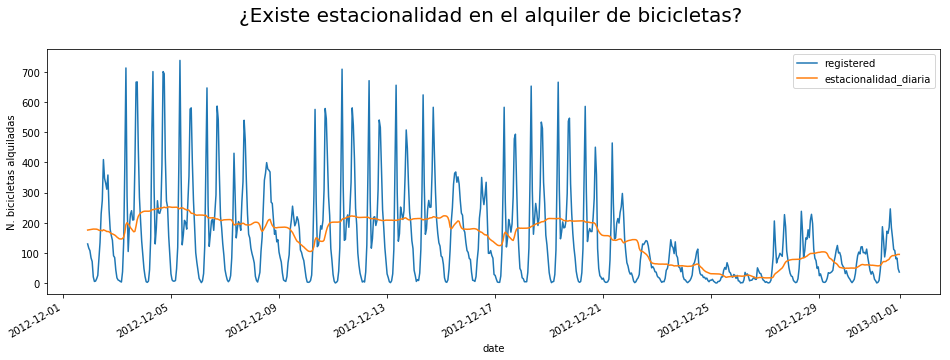

In [10]:
df_TimeSeriesData[-24*30:].plot(figsize=(16,5))
plt.title('¿Existe estacionalidad en el alquiler de bicicletas? \n',fontsize= 20)
plt.ylabel('N. bicicletas alquiladas')

In [11]:
"""
Una vez eliminada la componente diaria, eliminaremos la semanal.
Se hará uso de una media móvil con un período de 168h (1 semana)
sobre lo anteriormente calculado
"""
df_TimeSeriesData['estacionalidad_semanal'] = df_TimeSeriesData.estacionalidad_diaria.rolling(24*7).mean()
df_TimeSeriesData

registered  estacionalidad_diaria  estacionalidad_semanal
date                                                                          
2011-01-01 00:00:00          13                    NaN                     NaN
2011-01-01 01:00:00          32                    NaN                     NaN
2011-01-01 02:00:00          27                    NaN                     NaN
2011-01-01 03:00:00          10                    NaN                     NaN
2011-01-01 04:00:00           1                    NaN                     NaN
2011-01-01 05:00:00           1                    NaN                     NaN
2011-01-01 06:00:00           0                    NaN                     NaN
2011-01-01 07:00:00           2                    NaN                     NaN
2011-01-01 08:00:00           7                    NaN                     NaN
2011-01-01 09:00:00           6                    NaN                     NaN
2011-01-01 10:00:00          24                    NaN                     NaN
2011-01-01 11:00:00          30                    NaN                     NaN
2011-01-01 12:00:00          55                    NaN                     NaN
2011-01-01 13:00:00          47                    NaN                     NaN
2011-01-01 14:00:00          71                    NaN                     NaN
2011-01-01 15:00:00          70                    NaN                     NaN
2011-01-01 16:00:00          52                    NaN                     NaN
2011-01-01 17:00:00          52                    NaN                     NaN
2011-01-01 18:00:00          26                    NaN                     NaN
2011-01-01 19:00:00          31                    NaN                     NaN
2011-01-01 20:00:00          25                    NaN                     NaN
2011-01-01 21:00:00          31                    NaN                     NaN
2011-01-01 22:00:00          17                    NaN                     NaN
2011-01-01 23:00:00          24              27.250000                     NaN
2011-01-02 00:00:00          13              27.250000                     NaN
2011-01-02 01:00:00          16              26.583333                     NaN
2011-01-02 02:00:00           8              25.791667                     NaN
2011-01-02 03:00:00           4              25.541667                     NaN
2011-01-02 04:00:00           1              25.541667                     NaN
2011-01-02 06:00:00           2              25.583333                     NaN
...                         ...                    ...                     ...
2012-12-30 18:00:00         113              61.041667               52.153026
2012-12-30 19:00:00          86              60.875000               52.173115
2012-12-30 20:00:00          63              60.833333               52.190476
2012-12-30 21:00:00          42              60.250000               52.203621
2012-12-30 22:00:00          30              59.375000               52.212302
2012-12-30 23:00:00          39              59.666667               52.225446
2012-12-31 00:00:00          30              59.208333               52.232143
2012-12-31 01:00:00          13              58.625000               52.239087
2012-12-31 02:00:00           8              58.166667               52.246280
2012-12-31 03:00:00           1              57.625000               52.252232
2012-12-31 04:00:00           3              57.458333               52.260169
2012-12-31 05:00:00           9              57.750000               52.271577
2012-12-31 06:00:00          40              59.125000               52.289683
2012-12-31 07:00:00          83              62.041667               52.322669
2012-12-31 08:00:00         187              68.500000               52.388641
2012-12-31 09:00:00         144              71.791667               52.462798
2012-12-31 10:00:00          87              71.625000               52.529762
2012-12-31 11:00:00         114              72.083333               52

Text(0, 0.5, 'N. bicicletas alquiladas')

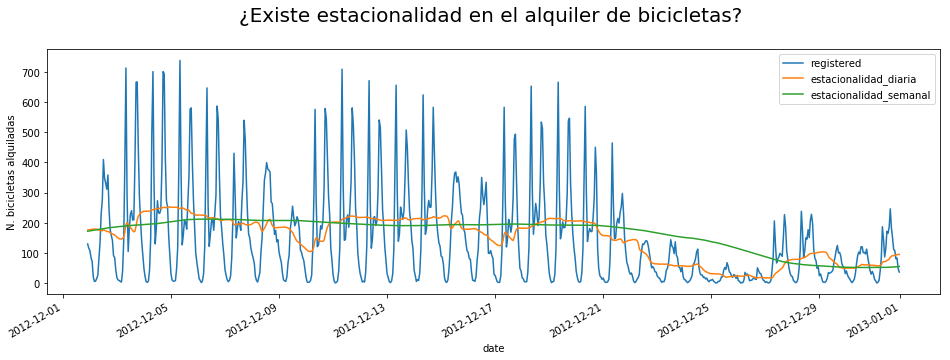

In [12]:
df_TimeSeriesData[-24*30:].plot(figsize=(16,5))
plt.title('¿Existe estacionalidad en el alquiler de bicicletas? \n',fontsize= 20)
plt.ylabel('N. bicicletas alquiladas')

In [13]:
"""
Una vez eliminada la componente semanal, eliminaremos la mensual.
Se hará uso de una media móvil con un período de 720h (1 mes)
sobre lo anteriormente calculado
"""
df_TimeSeriesData['estacionalidad_mensual'] = df_TimeSeriesData.estacionalidad_semanal.rolling(24*30).mean()
df_TimeSeriesData

registered  estacionalidad_diaria  \
date                                                     
2011-01-01 00:00:00          13                    NaN   
2011-01-01 01:00:00          32                    NaN   
2011-01-01 02:00:00          27                    NaN   
2011-01-01 03:00:00          10                    NaN   
2011-01-01 04:00:00           1                    NaN   
2011-01-01 05:00:00           1                    NaN   
2011-01-01 06:00:00           0                    NaN   
2011-01-01 07:00:00           2                    NaN   
2011-01-01 08:00:00           7                    NaN   
2011-01-01 09:00:00           6                    NaN   
2011-01-01 10:00:00          24                    NaN   
2011-01-01 11:00:00          30                    NaN   
2011-01-01 12:00:00          55                    NaN   
2011-01-01 13:00:00          47                    NaN   
2011-01-01 14:00:00          71                    NaN   
2011-01-01 15:00:00          70                    NaN   
2011-01-01 16:00:00          52                    NaN   
2011-01-01 17:00:00          52                    NaN   
2011-01-01 18:00:00          26                    NaN   
2011-01-01 19:00:00          31                    NaN   
2011-01-01 20:00:00          25                    NaN   
2011-01-01 21:00:00          31                    NaN   
2011-01-01 22:00:00          17                    NaN   
2011-01-01 23:00:00          24              27.250000   
2011-01-02 00:00:00          13              27.250000   
2011-01-02 01:00:00          16              26.583333   
2011-01-02 02:00:00           8              25.791667   
2011-01-02 03:00:00           4              25.541667   
2011-01-02 04:00:00           1              25.541667   
2011-01-02 06:00:00           2              25.583333   
...                         ...                    ...   
2012-12-30 18:00:00         113              61.041667   
2012-12-30 19:00:00          86              60.875000   
2012-12-30 20:00:00          63              60.833333   
2012-12-30 21:00:00          42              60.250000   
2012-12-30 22:00:00          30              59.375000   
2012-12-30 23:00:00          39              59.666667   
2012-12-31 00:00:00          30              59.208333   
2012-12-31 01:00:00          13              58.625000   
2012-12-31 02:00:00           8              58.166667   
2012-12-31 03:00:00           1              57.625000   
2012-12-31 04:00:00           3              57.458333   
2012-12-31 05:00:00           9              57.750000   
2012-12-31 06:00:00          40              59.125000   
2012-12-31 07:00:00          83              62.041667   
2012-12-31 08:00:00         187              68.500000   
2012-12-31 09:00:00         144              71.791667   
2012-12-31 10:00:00          87              71.625000   
2012-12-31 11:00:00         114              72.083333   
2012-12-31 12:00:00         172              75.208333   
2012-12-31 13:00:00         165              77.083333   
2012-12-31 14:00:00         185              79.750000   
2012-12-31 15:00:00         246              85.791667   
2012-12-31 16:00:00         184              89.208333   
2012-12-31 17:00:00         150              91.416667   
2012-12-31 18:00:00         112              91.375000   
2012-12-31 19:00:00         108              92.291667   
2012-12-31 20:00:00          81              93.041667   
2012-12-31 21:00:00          83              94.750000   
2012-12-31 22:00:00          48              95.500000   
2012-12-31 23:00:00          37              95.416667   

                     estacionalidad_semanal  estacionalidad_mensual  
date                                                                 
2011-01-01 00:00:00                     NaN                     NaN  
2011-01-01 01:00:00                     NaN                     NaN  
2011-01-01 02:00:00                     NaN                     NaN  
2011-01-01 03:00

Text(0, 0.5, 'N. bicicletas alquiladas')

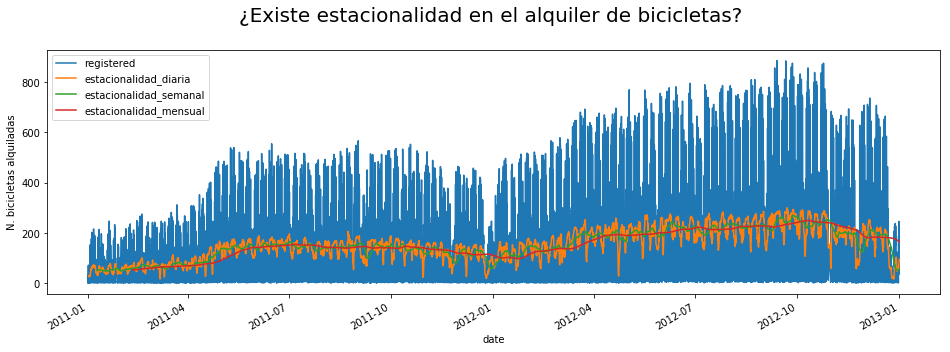

In [14]:
df_TimeSeriesData.plot(figsize=(16,5))
plt.title('¿Existe estacionalidad en el alquiler de bicicletas? \n',fontsize= 20)
plt.ylabel('N. bicicletas alquiladas')

Text(0, 0.5, 'N. bicicletas alquiladas')

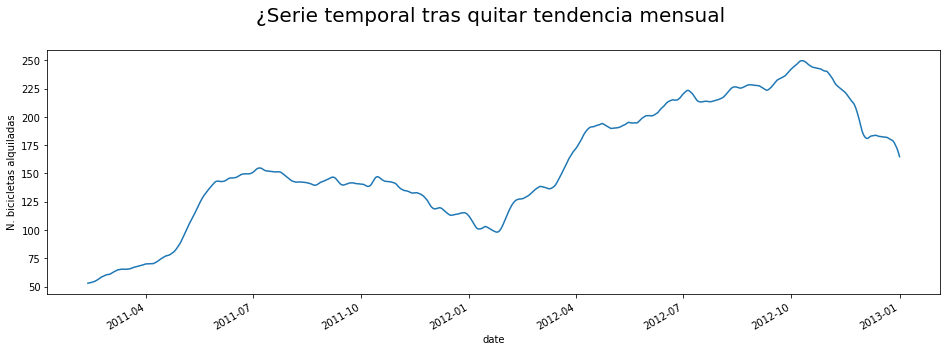

In [15]:
df_TimeSeriesData['estacionalidad_mensual'].plot(figsize=(16,5))
plt.title('¿Serie temporal tras quitar tendencia mensual \n',fontsize= 20)
plt.ylabel('N. bicicletas alquiladas')

In [16]:
"""
Una vez eliminada la componente mensual, eliminaremos la anual.
Se hará uso de una media móvil con un período de 8760h (1 año)
sobre lo anteriormente calculado
"""
df_TimeSeriesData['estacionalidad_anual'] = df_TimeSeriesData.estacionalidad_semanal.rolling(24*365).mean()
df_TimeSeriesData

registered  estacionalidad_diaria  \
date                                                     
2011-01-01 00:00:00          13                    NaN   
2011-01-01 01:00:00          32                    NaN   
2011-01-01 02:00:00          27                    NaN   
2011-01-01 03:00:00          10                    NaN   
2011-01-01 04:00:00           1                    NaN   
2011-01-01 05:00:00           1                    NaN   
2011-01-01 06:00:00           0                    NaN   
2011-01-01 07:00:00           2                    NaN   
2011-01-01 08:00:00           7                    NaN   
2011-01-01 09:00:00           6                    NaN   
2011-01-01 10:00:00          24                    NaN   
2011-01-01 11:00:00          30                    NaN   
2011-01-01 12:00:00          55                    NaN   
2011-01-01 13:00:00          47                    NaN   
2011-01-01 14:00:00          71                    NaN   
2011-01-01 15:00:00          70                    NaN   
2011-01-01 16:00:00          52                    NaN   
2011-01-01 17:00:00          52                    NaN   
2011-01-01 18:00:00          26                    NaN   
2011-01-01 19:00:00          31                    NaN   
2011-01-01 20:00:00          25                    NaN   
2011-01-01 21:00:00          31                    NaN   
2011-01-01 22:00:00          17                    NaN   
2011-01-01 23:00:00          24              27.250000   
2011-01-02 00:00:00          13              27.250000   
2011-01-02 01:00:00          16              26.583333   
2011-01-02 02:00:00           8              25.791667   
2011-01-02 03:00:00           4              25.541667   
2011-01-02 04:00:00           1              25.541667   
2011-01-02 06:00:00           2              25.583333   
...                         ...                    ...   
2012-12-30 18:00:00         113              61.041667   
2012-12-30 19:00:00          86              60.875000   
2012-12-30 20:00:00          63              60.833333   
2012-12-30 21:00:00          42              60.250000   
2012-12-30 22:00:00          30              59.375000   
2012-12-30 23:00:00          39              59.666667   
2012-12-31 00:00:00          30              59.208333   
2012-12-31 01:00:00          13              58.625000   
2012-12-31 02:00:00           8              58.166667   
2012-12-31 03:00:00           1              57.625000   
2012-12-31 04:00:00           3              57.458333   
2012-12-31 05:00:00           9              57.750000   
2012-12-31 06:00:00          40              59.125000   
2012-12-31 07:00:00          83              62.041667   
2012-12-31 08:00:00         187              68.500000   
2012-12-31 09:00:00         144              71.791667   
2012-12-31 10:00:00          87              71.625000   
2012-12-31 11:00:00         114              72.083333   
2012-12-31 12:00:00         172              75.208333   
2012-12-31 13:00:00         165              77.083333   
2012-12-31 14:00:00         185              79.750000   
2012-12-31 15:00:00         246              85.791667   
2012-12-31 16:00:00         184              89.208333   
2012-12-31 17:00:00         150              91.416667   
2012-12-31 18:00:00         112              91.375000   
2012-12-31 19:00:00         108              92.291667   
2012-12-31 20:00:00          81              93.041667   
2012-12-31 21:00:00          83              94.750000   
2012-12-31 22:00:00          48              95.500000   
2012-12-31 23:00:00          37              95.416667   

                     estacionalidad_semanal  estacionalidad_mensual  \
date                                                                  
2011-01-01 00:00:00                     NaN                     NaN   
2011-01-01 01:00:00                     NaN                     NaN   
2011-01-01 02:00:00                     NaN                     NaN   
2011-01-01 

Text(0, 0.5, 'N. bicicletas alquiladas')

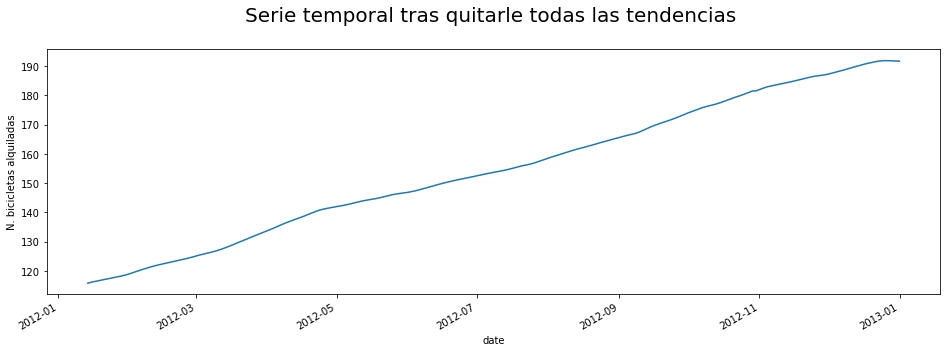

In [17]:
df_TimeSeriesData['estacionalidad_anual'].plot(figsize=(16,5))
plt.title('Serie temporal tras quitarle todas las tendencias \n',fontsize= 20)
plt.ylabel('N. bicicletas alquiladas')

Como se puede observar, una vez quitamos todas las estacionalidades (diaria, semanal, mensual y anual), existe tendencia en la serie temporal.

### 3.2. Si existe tendencia, elimínala y representa los resultados.

In [18]:
"""
Para eliminar la tendencia, calcularemos la diferencia con 
el dato anterior; escogiendo los datos sin ningún tipo de estacionalidad.
"""
df_TimeSeriesData['tendencia'] = df_TimeSeriesData['estacionalidad_anual'] - df_TimeSeriesData['estacionalidad_anual'].shift(1)

Text(0, 0.5, 'N. bicicletas alquiladas')

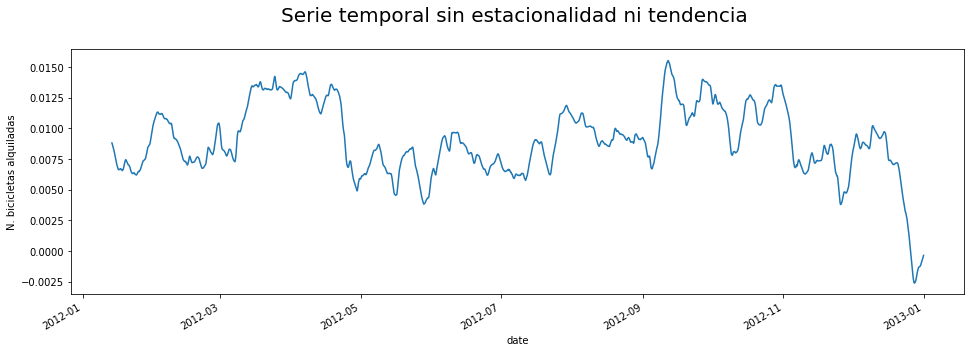

In [19]:
df_TimeSeriesData['tendencia'].plot(figsize=(16,5))
plt.title('Serie temporal sin estacionalidad ni tendencia \n',fontsize= 20)
plt.ylabel('N. bicicletas alquiladas')